# IMPORTING THE LIBRARIES 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt1 

import statistics
import os

###############################################
from peakutils import indexes
from peakutils import baseline
from scipy.signal import find_peaks as fp
from scipy.signal import savgol_filter 

###############################################
from bokeh.plotting import figure , show
from pybaselines import whittaker as pl



from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

# DATA ARRANGEMENT

In the main directory we can see that there are 8 subfolders. 

Each subfolder have almost 12 spectras per sample , the idea behind that would be , instead of having just one spectra per sample , and to just rely on one information , its always better have to multiple measurements per samples , and then this could be used for building the Calibration Model

Instead of having 12 different csv per samples , its always good to have a single dataframe -> This new dataframe will have 1st column as wavelength , and 2nd -13th column as Intensities 

In [3]:
def load_data(folder_path):
    # List to store DataFrames for intensity columns
    intensity_dfs = []

    # List to store CSV file names
    csv_file_names = []

    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            
            # Read CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Extract intensity column and store it in the list
            intensity_dfs.append(df.iloc[:, 1])  # Assuming intensity is in the second column
            
            # Store CSV file name
            csv_file_names.append(os.path.splitext(file_name)[0])

    # Read the wavelength column from the first CSV file
    wavelength_df = pd.read_csv(os.path.join(folder_path, os.listdir(folder_path)[1]), usecols=[0])

    # Concatenate wavelength column with intensity columns
    result_df = pd.concat([wavelength_df] + intensity_dfs, axis=1)

    # Rename the columns with CSV file names
    column_names = ['wavelength'] + [f'{csv_file_names[i]}' for i in range(len(intensity_dfs))]

    result_df.columns = column_names
    # result_df.reset_index(drop=True, inplace=True)

    return result_df

Loading the dataframe.

In [4]:
SAMPLE1_Raw_df = load_data('Batch_2/sample_1')
###################################################
SAMPLE2_Raw_df = load_data('Batch_2/sample_2')
###################################################
SAMPLE3_Raw_df = load_data('Batch_2/sample_3')
###################################################
SAMPLE4_Raw_df = load_data('Batch_2/sample_4')
###################################################
SAMPLE5_Raw_df = load_data('Batch_2/sample_5')
###################################################
SAMPLE6_Raw_df = load_data('Batch_2/sample_6')
###################################################
SAMPLE7_Raw_df = load_data('Batch_2/sample_7')
####################################################
SAMPLE8_Raw_df = load_data('Batch_2/sample_8')
####################################################
SAMPLE9_Raw_df = load_data('Batch_3/sample_9')
####################################################
SAMPLE10_Raw_df = load_data('Batch_3/sample_10')
####################################################
SAMPLE11_Raw_df = load_data('Batch_3/sample_11')
####################################################
SAMPLE12_Raw_df = load_data('Batch_3/sample_12')
####################################################
SAMPLE13_Raw_df = load_data('Batch_3/sample_13')
####################################################
SAMPLE14_Raw_df = load_data('Batch_3/sample_14')
####################################################
SAMPLE15_Raw_df = load_data('Batch_3/sample_15')
####################################################
SAMPLE16_Raw_df = load_data('Batch_3/sample_16')
####################################################
SAMPLE17_Raw_df = load_data('Batch_3/sample_17')
####################################################

SAMPLE1_Raw_df

wavelength  sample1_10  sample1_11  sample1_12  sample1_9  sample1_8  \
0      180.000000         0.0         0.0         0.0        0.0        0.0   
1      180.033333         0.0         0.0         0.0        0.0        0.0   
2      180.066667         0.0         0.0         0.0        0.0        0.0   
3      180.100000         0.0         0.0         0.0        0.0        0.0   
4      180.133333         0.0         0.0         0.0        0.0        0.0   
...           ...         ...         ...         ...        ...        ...   
23426  960.866667         0.0         0.0         0.0        0.0        0.0   
23427  960.900000         0.0         0.0         0.0        0.0        0.0   
23428  960.933333         0.0         0.0         0.0        0.0        0.0   
23429  960.966667         0.0         0.0         0.0        0.0        0.0   
23430  961.000000         0.0         0.0         0.0        0.0        0.0   

       sample1_5  sample1_4  sample1_6  sample1_7  sample1_3  sample1_2  \
0            0.0        0.0        0.0        0.0        0.0        0.0   
1            0.0        0.0        0.0        0.0        0.0        0.0   
2            0.0        0.0        0.0        0.0        0.0        0.0   
3            0.0        0.0        0.0        0.0        0.0        0.0   
4            0.0        0.0        0.0        0.0        0.0        0.0   
...          ...        ...        ...        ...        ...        ...   
23426        0.0        0.0        0.0        0.0        0.0        0.0   
23427        0.0        0.0        0.0        0.0        0.0        0.0   
23428        0.0        0.0        0.0        0.0        0.0        0.0   
23429        0.0        0.0        0.0        0.0        0.0        0.0   
23430        0.0        0.0        0.0        0.0        0.0        0.0   

       sample1_1  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
23426        0.0  
23427        0.0  
23428        0.0  
23429        0.0  
23430        0.0  

[23431 rows x 13 columns]

# Peak Selection and Data Trimming

The dataframe  which we have is very big ,it could be trimmed now according to the wavelength , by adjusting two parameters "Wavelength_Min" , "Wavelength_Max"

In [5]:


#Getting the full wavelength
Wavelength_Min = 200
Wavelength_Max = 540


SAMPLE1_Select_df = SAMPLE1_Raw_df[(SAMPLE1_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE1_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE2_Select_df = SAMPLE2_Raw_df[(SAMPLE2_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE2_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE3_Select_df = SAMPLE3_Raw_df[(SAMPLE3_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE3_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE4_Select_df = SAMPLE4_Raw_df[(SAMPLE4_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE4_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE5_Select_df = SAMPLE5_Raw_df[(SAMPLE5_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE5_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE6_Select_df = SAMPLE6_Raw_df[(SAMPLE6_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE6_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE7_Select_df = SAMPLE7_Raw_df[(SAMPLE7_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE7_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE8_Select_df = SAMPLE8_Raw_df[(SAMPLE8_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE8_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE9_Select_df = SAMPLE9_Raw_df[(SAMPLE9_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE9_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE10_Select_df = SAMPLE10_Raw_df[(SAMPLE10_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE10_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE11_Select_df = SAMPLE11_Raw_df[(SAMPLE11_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE11_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE12_Select_df = SAMPLE12_Raw_df[(SAMPLE12_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE12_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE13_Select_df = SAMPLE13_Raw_df[(SAMPLE13_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE13_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE14_Select_df = SAMPLE14_Raw_df[(SAMPLE14_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE14_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE15_Select_df = SAMPLE15_Raw_df[(SAMPLE15_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE15_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE16_Select_df = SAMPLE16_Raw_df[(SAMPLE16_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE16_Raw_df['wavelength'] <= Wavelength_Max)]
SAMPLE17_Select_df = SAMPLE17_Raw_df[(SAMPLE17_Raw_df['wavelength'] >= Wavelength_Min) & (SAMPLE17_Raw_df['wavelength'] <= Wavelength_Max)]


SAMPLE1_Select_df


wavelength   sample1_10   sample1_11   sample1_12    sample1_9  \
601    200.033333  1660.683423  1780.601469  1735.864034  1314.921826   
602    200.066667  1706.760336  1831.132960  1783.977604  1327.308446   
603    200.100000  1277.072273  1369.918974  1333.986436   979.554678   
604    200.133333   699.384244   749.166716   729.179783   530.887807   
605    200.166667   303.402844   323.201785   314.871661   233.132945   
...           ...          ...          ...          ...          ...   
10795  539.833333   980.388803  1018.121334   982.500553   685.803852   
10796  539.866667   916.721930   951.185409   921.067369   655.564284   
10797  539.900000   921.132954   954.639798   925.468952   674.584075   
10798  539.933333   972.542838  1006.752288   975.244841   718.443812   
10799  539.966667  1037.327005  1072.801304  1037.904506   761.936344   

         sample1_8    sample1_5    sample1_4    sample1_6    sample1_7  \
601    1735.735553  1714.475074  1753.877787  1829.888633  1916.347852   
602    1752.945188  1634.697506  1691.196757  1736.814693  1807.088663   
603    1299.062552  1173.104105  1246.272603  1234.224664  1262.607821   
604     711.889925   644.120880   721.906876   664.224376   653.927276   
605     319.681021   317.529350   379.206095   319.786016   297.954161   
...            ...          ...          ...          ...          ...   
10795   968.085804   958.057824   960.008594   976.423269   957.671792   
10796   921.224879   928.560718   924.104791   947.999482   935.666214   
10797   943.340204   958.193173   948.629686   981.868398   971.989745   
10798  1001.419523  1014.938467  1002.561307  1043.399493  1032.888176   
10799  1061.337881  1066.977724  1055.056539  1098.182914  1084.835454   

         sample1_3    sample1_2    sample1_1  
601    1792.686539  1536.626850  1226.193179  
602    1714.243345  1330.316281  1235.182687  
603    1239.641662   961.268904  1096.440802  
604     691.866759   610.275750   830.776241  
605     348.379066   357.576246   505.590073  
...            ...          ...          ...  
10795   973.226802   981.818121   914.824420  
10796   940.472362   927.017453   858.478783  
10797   968.200660   936.451920   870.989924  
10798  1024.468102   981.935085   921.450667  
10799  1077.521786  1034.761593   978.400879  

[10199 rows x 13 columns]

Lets plot a line plot ,to get a better picture 

In [6]:
Selected_df_Plot = figure(title = 'Selected Data Plot' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')

Selected_df_Plot.line(SAMPLE1_Select_df.wavelength,SAMPLE1_Select_df.sample1_6 , line_width = 2, color ="blue" )
#####################################################################################################################
Selected_df_Plot.line(SAMPLE2_Select_df.wavelength,SAMPLE2_Select_df.sample2_6 , line_width = 2, color ="orange" )
###############################################################################################################
Selected_df_Plot.line(SAMPLE3_Select_df.wavelength,SAMPLE3_Select_df.sample3_6 , line_width = 2, color ="green")
######################################################################################################################
Selected_df_Plot.line(SAMPLE4_Select_df.wavelength,SAMPLE4_Select_df.sample4_6 , line_width = 2, color ="red")
##############################################################################################################
Selected_df_Plot.line(SAMPLE5_Select_df.wavelength,SAMPLE5_Select_df.sample5_6 , line_width = 2, color ="purple")
###############################################################################################################
Selected_df_Plot.line(SAMPLE6_Select_df.wavelength,SAMPLE6_Select_df.sample6_6 , line_width = 2, color ="brown")
####################################################################################################################
Selected_df_Plot.line(SAMPLE7_Select_df.wavelength,SAMPLE7_Select_df.sample7_6 , line_width = 2, color ="pink")
##################################################################################################################
Selected_df_Plot.line(SAMPLE8_Select_df.wavelength,SAMPLE8_Select_df.sample8_6 , line_width = 2, color ="gray")
###################################################################################################################
Selected_df_Plot.line(SAMPLE9_Select_df.wavelength,SAMPLE9_Select_df.sample9_6 , line_width = 2, color ="olive")
###################################################################################################################
Selected_df_Plot.line(SAMPLE10_Select_df.wavelength,SAMPLE10_Select_df.sample10_6 , line_width = 2, color ="Cyan")
###################################################################################################################
Selected_df_Plot.line(SAMPLE11_Select_df.wavelength,SAMPLE11_Select_df.sample11_6 , line_width = 2, color ="black")
###################################################################################################################
Selected_df_Plot.line(SAMPLE12_Select_df.wavelength,SAMPLE12_Select_df.sample12_6 , line_width = 2, color ="tomato")
###################################################################################################################
Selected_df_Plot.line(SAMPLE13_Select_df.wavelength,SAMPLE13_Select_df.sample13_6 , line_width = 2, color ="steelblue")
###################################################################################################################
Selected_df_Plot.line(SAMPLE14_Select_df.wavelength,SAMPLE14_Select_df.sample14_6 , line_width = 2, color ="limegreen")
###################################################################################################################
Selected_df_Plot.line(SAMPLE15_Select_df.wavelength,SAMPLE15_Select_df.sample15_6 , line_width = 2, color ="deeppink")
###################################################################################################################
Selected_df_Plot.line(SAMPLE16_Select_df.wavelength,SAMPLE16_Select_df.sample16_6 , line_width = 2, color ="gold")
###################################################################################################################
Selected_df_Plot.line(SAMPLE17_Select_df.wavelength,SAMPLE17_Select_df.sample17_6 , line_width = 2, color ="indigo")
###################################################################################################################

Selected_df_Plot.width = 1200
Selected_df_Plot.height = 500
show(Selected_df_Plot)

# Data Preprocessing of the Spectra

In [7]:
def baseline_correction(df):
    """
    Perform baseline correction on the intensity columns of the input DataFrame and create a new DataFrame with corrected values.
    
    Parameters:
        df (DataFrame): Input DataFrame containing the wavelength and intensity columns.
        
    Returns:
        DataFrame: New DataFrame with baseline-corrected intensity columns and the same wavelength column as the input DataFrame.
    """
    # Copy the 'wavelength' column from the input DataFrame
    new_df = pd.DataFrame({'wavelength': df['wavelength']})
    
    # Perform baseline correction for each intensity column and add them to the new DataFrame
    for col in df.columns[1:]:  # Exclude the 'wavelength' column
        baseline, _ = pl.asls(df[col])
        corrected_values = df[col] - baseline
        new_df[col] = corrected_values
    
    return new_df

The above plot eventhough a spectra , is still a Raw Spectra , which still has lot of Artifects , before proceeding for the Univariate Calibration , its important to Pre Process the Raw Spectra accordingly. Various Pre Processing Techniques could be used here :- 

1) Baseline Correction - Very Very little  background radiation is still present in the spectra, which corresponds to the spectral baseline and imposes difficulties for quantitative elemental analysis.

In [8]:
SAMPLE1_BaselineCorrected_df = baseline_correction(SAMPLE1_Select_df)
SAMPLE2_BaselineCorrected_df = baseline_correction(SAMPLE2_Select_df)
SAMPLE3_BaselineCorrected_df = baseline_correction(SAMPLE3_Select_df)
SAMPLE4_BaselineCorrected_df = baseline_correction(SAMPLE4_Select_df)
SAMPLE5_BaselineCorrected_df = baseline_correction(SAMPLE5_Select_df)
SAMPLE6_BaselineCorrected_df = baseline_correction(SAMPLE6_Select_df)
SAMPLE7_BaselineCorrected_df = baseline_correction(SAMPLE7_Select_df)
SAMPLE8_BaselineCorrected_df = baseline_correction(SAMPLE8_Select_df)
SAMPLE9_BaselineCorrected_df = baseline_correction(SAMPLE9_Select_df)
SAMPLE10_BaselineCorrected_df = baseline_correction(SAMPLE10_Select_df)
SAMPLE11_BaselineCorrected_df = baseline_correction(SAMPLE11_Select_df)
SAMPLE12_BaselineCorrected_df = baseline_correction(SAMPLE12_Select_df)
SAMPLE13_BaselineCorrected_df = baseline_correction(SAMPLE13_Select_df)
SAMPLE14_BaselineCorrected_df = baseline_correction(SAMPLE14_Select_df)
SAMPLE15_BaselineCorrected_df = baseline_correction(SAMPLE15_Select_df)
SAMPLE16_BaselineCorrected_df = baseline_correction(SAMPLE16_Select_df)
SAMPLE17_BaselineCorrected_df = baseline_correction(SAMPLE17_Select_df)

SAMPLE1_BaselineCorrected_df

wavelength   sample1_10   sample1_11   sample1_12    sample1_9  \
601    200.033333  1502.692595  1614.597237  1574.311592  1196.051143   
602    200.066667  1548.937827  1665.302241  1622.613971  1208.549341   
603    200.100000  1119.418068  1204.261751  1172.811595   860.907139   
604    200.133333   541.898298   583.682941   568.193686   412.351797   
605    200.166667   146.085069   157.891363   154.074217   114.708396   
...           ...          ...          ...          ...          ...   
10795  539.833333   243.713239   253.351663   242.352131   144.368771   
10796  539.866667   177.930573   184.228933   178.797045   112.503464   
10797  539.900000   180.225790   185.496503   181.076712   129.897504   
10798  539.933333   229.519858   235.422164   228.730675   172.131484   
10799  539.966667   292.188207   299.284349   289.268412   213.998258   

         sample1_8    sample1_5    sample1_4    sample1_6    sample1_7  \
601    1572.892750  1562.292320  1594.330430  1663.998783  1750.104130   
602    1590.244015  1482.618552  1531.733321  1571.073977  1641.022572   
603    1136.502994  1021.128936  1086.893073  1068.633066  1096.719344   
604     549.471935   492.249449   562.611206   498.781847   488.216361   
605     157.404508   165.761572   219.994194   154.492464   132.420713   
...            ...          ...          ...          ...          ...   
10795   209.053549   180.229395   186.365714   187.634532   175.653297   
10796   159.926416   148.376322   148.114028   156.818213   151.291755   
10797   179.775519   175.652795   170.291025   188.294581   185.259307   
10798   235.588606   230.042100   221.874741   247.433119   243.801751   
10799   293.240730   279.725363   272.022064   299.823980   293.393039   

         sample1_3    sample1_2    sample1_1  
601    1629.866105  1397.183927  1111.215292  
602    1551.527495  1190.819315  1120.118322  
603    1077.030379   821.717881   981.289948  
604     529.359995   470.670631   715.538864  
605     185.976731   217.916956   390.266107  
...            ...          ...          ...  
10795   185.261137   208.219661   189.871869  
10796   150.119782   151.131584   131.384457  
10797   175.461152   158.278628   141.753810  
10798   229.341656   201.474363   190.072758  
10799   280.008401   252.013438   244.881173  

[10199 rows x 13 columns]

In [9]:
Baseline_Correction_Plot = figure(title = 'Baseline Correction' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')

Baseline_Correction_Plot.line(SAMPLE4_Select_df.wavelength,SAMPLE4_Select_df.sample4_1 , line_width = 2, color ="red" )
Baseline_Correction_Plot.line(SAMPLE4_BaselineCorrected_df.wavelength,SAMPLE4_BaselineCorrected_df.sample4_1 , line_width = 2, color ="green" )


Baseline_Correction_Plot.width = 900
Baseline_Correction_Plot.height = 500
show(Baseline_Correction_Plot)

2) Normalization - Its usually noticed that , for a measurement of a similar sample ,there is a lot of scattering in the intensities , this typical artifect is called scattering.

For Instance , you could see the plot above , Though this are the plots from the same sample SAMPLE1 , measured on 12 different Areas , its quite visible , for some  spectras , the peak heights or Intensities are not same.


In [10]:

# def standard_normal_variate_normalization(df):
#     # Selecting only the intensity columns (assuming the first column is wavelength)
#     intensities = df.iloc[:, 1:]

#     # Calculating mean and standard deviation for each column
#     means = intensities.mean(axis=0)
#     stds = intensities.std(axis=0)

#     # Applying standard normal variate normalization column-wise
#     normalized_intensities = (intensities - means) / stds

#     # Combining the wavelength column with normalized intensities
#     normalized_df = pd.concat([df.iloc[:, 0], normalized_intensities], axis=1)

#     # Calculating mean and standard deviation for each normalized column
#     normalized_means = normalized_intensities.mean(axis=0)
#     normalized_stds = normalized_intensities.std(axis=0)

#     return normalized_df


In [11]:
def standard_normal_variate_normalization(df):
    # Select columns containing intensities
    intensity_cols = df.columns[1:]  #  columns 2 to 13 are intensities and are stored in intensity_cols

    # SVN normalization
    for col in intensity_cols:
        mean_intensity = df[col].mean()
        std_intensity = df[col].std()
        df[col] = (df[col] - mean_intensity) / std_intensity

    return df

In [12]:

def total_intensity_normalization(df):
    # Selecting only the intensity columns (assuming the first column is wavelength)
    intensities = df.iloc[:, 1:]  

    # Initialize an empty DataFrame to store normalized intensities
    normalized_intensities = pd.DataFrame()

    # Iterate over each column (each spectrum)
    for column in intensities.columns:
        spectrum = intensities[column]
        total_intensity = spectrum.sum()
        
        # Normalize the spectrum by dividing each intensity value by the total intensity
        normalized_spectrum = spectrum / total_intensity
        
        # Append the normalized spectrum to the DataFrame of normalized intensities
        normalized_intensities[column] = normalized_spectrum

    # Combine the wavelength column with normalized intensities
    normalized_df = pd.concat([df.iloc[:, 0], normalized_intensities], axis=1)

    return normalized_df

In [13]:

def unit_norm_normalization(df):
    # Selecting only the intensity columns (assuming the first column is wavelength)
    intensities_1 = df.iloc[:, 1:]  
    
    # Initialize an empty DataFrame to store normalized intensities
    normalized_intensities_1 = pd.DataFrame()

    # Iterate over each column (each spectrum)
    for column_1 in intensities_1.columns:
        spectrum_1 = intensities_1[column_1]
        
        # Calculate the norm of the spectrum using a simple equation
        spectrum_norm = np.sqrt(np.sum(spectrum_1 ** 2))
        
        # Normalize the spectrum by dividing each intensity value by its norm
        normalized_spectrum_1 = spectrum_1 / spectrum_norm
        
        # Assign the normalized spectrum to the DataFrame of normalized intensities
        normalized_intensities_1[column_1] = normalized_spectrum_1

    # Combine the wavelength column with normalized intensities
    normalized_df_1 = pd.concat([df.iloc[:, 0], normalized_intensities_1], axis=1)
    
    return normalized_df_1


In [14]:

def max_intensity_normalization(df):
    # Selecting only the intensity columns (assuming the first column is wavelength)
    intensities_2 = df.iloc[:, 1:]  

    # Initialize an empty DataFrame to store normalized intensities
    normalized_intensities_2 = pd.DataFrame()

    # Iterate over each column (each spectrum)
    for column_2 in intensities_2.columns:
        spectrum_2 = intensities_2[column_2]
        
        # Find the maximum intensity value in the spectrum
        max_intensity = spectrum_2.max()
        
        # Normalize the spectrum by dividing each intensity value by the maximum intensity
        normalized_spectrum_2 = spectrum_2 / max_intensity
        
        # Assign the normalized spectrum to the DataFrame of normalized intensities
        normalized_intensities_2[column_2] = normalized_spectrum_2

    # Combine the wavelength column with normalized intensities
    normalized_df_2 = pd.concat([df.iloc[:, 0], normalized_intensities_2], axis=1)

    return normalized_df_2


In [15]:
SAMPLE1_Normalized_df = total_intensity_normalization(SAMPLE1_BaselineCorrected_df)
SAMPLE2_Normalized_df = total_intensity_normalization(SAMPLE2_BaselineCorrected_df)
SAMPLE3_Normalized_df = total_intensity_normalization(SAMPLE3_BaselineCorrected_df)
SAMPLE4_Normalized_df = total_intensity_normalization(SAMPLE4_BaselineCorrected_df)
SAMPLE5_Normalized_df = total_intensity_normalization(SAMPLE5_BaselineCorrected_df)
SAMPLE6_Normalized_df = total_intensity_normalization(SAMPLE6_BaselineCorrected_df)
SAMPLE7_Normalized_df = total_intensity_normalization(SAMPLE7_BaselineCorrected_df)
SAMPLE8_Normalized_df = total_intensity_normalization(SAMPLE8_BaselineCorrected_df)
SAMPLE9_Normalized_df = total_intensity_normalization(SAMPLE9_BaselineCorrected_df)
SAMPLE10_Normalized_df = total_intensity_normalization(SAMPLE10_BaselineCorrected_df)
SAMPLE11_Normalized_df = total_intensity_normalization(SAMPLE11_BaselineCorrected_df)
SAMPLE12_Normalized_df = total_intensity_normalization(SAMPLE12_BaselineCorrected_df)
SAMPLE13_Normalized_df = total_intensity_normalization(SAMPLE13_BaselineCorrected_df)
SAMPLE14_Normalized_df = total_intensity_normalization(SAMPLE14_BaselineCorrected_df)
SAMPLE15_Normalized_df = total_intensity_normalization(SAMPLE15_BaselineCorrected_df)
SAMPLE16_Normalized_df = total_intensity_normalization(SAMPLE16_BaselineCorrected_df)
SAMPLE17_Normalized_df = total_intensity_normalization(SAMPLE17_BaselineCorrected_df)

# print(SAMPLE4_Normalized_df)


# mean_intensity = SAMPLE7_Normalized_df['sample7_6'].mean()
# std_intensity = SAMPLE7_Normalized_df['sample7_12'].std()

# print(mean_intensity)
# print(std_intensity)

3) Smoothing of the Spectrum - Now even though , the signal from the hLIBS Instrument doesn't appear to have much noise , we could still implement this additional signal smoothing steps , in our Data Processing Pipeline

In [16]:
def apply_savitzky_golay_smoothing(df, window_length=20, polyorder=15):
    # Selecting only the normalized intensity columns
    normalized_intensities = df.iloc[:, 1:]

    # Applying Savitzky-Golay smoothing to each intensity column
    smoothed_intensities = normalized_intensities.apply(lambda x: savgol_filter(x, window_length, polyorder), axis=0)

    # Combining wavelength column with smoothed intensities
    smoothed_df = pd.concat([df.iloc[:, 0], smoothed_intensities], axis=1)

    return smoothed_df

In [17]:
SAMPLE1_Smoothed_df = SAMPLE1_Normalized_df
SAMPLE2_Smoothed_df = SAMPLE2_Normalized_df
SAMPLE3_Smoothed_df = SAMPLE3_Normalized_df
SAMPLE4_Smoothed_df = SAMPLE4_Normalized_df
SAMPLE5_Smoothed_df = SAMPLE5_Normalized_df
SAMPLE6_Smoothed_df = SAMPLE6_Normalized_df
SAMPLE7_Smoothed_df = SAMPLE7_Normalized_df
SAMPLE8_Smoothed_df = SAMPLE8_Normalized_df
SAMPLE9_Smoothed_df = SAMPLE9_Normalized_df
SAMPLE10_Smoothed_df = SAMPLE10_Normalized_df
SAMPLE11_Smoothed_df = SAMPLE11_Normalized_df
SAMPLE12_Smoothed_df = SAMPLE12_Normalized_df
SAMPLE13_Smoothed_df = SAMPLE13_Normalized_df
SAMPLE14_Smoothed_df = SAMPLE14_Normalized_df
SAMPLE15_Smoothed_df = SAMPLE15_Normalized_df
SAMPLE16_Smoothed_df = SAMPLE16_Normalized_df
SAMPLE17_Smoothed_df = SAMPLE17_Normalized_df


Smoothed_Plot = figure(title = 'After Smoothing of the Spectrum' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')

Smoothed_Plot.line(SAMPLE1_Smoothed_df.wavelength,SAMPLE1_Smoothed_df.sample1_6 , line_width = 2, color ="blue" )
#####################################################################################################################
Smoothed_Plot.line(SAMPLE2_Smoothed_df.wavelength,SAMPLE2_Smoothed_df.sample2_6 , line_width = 2, color ="orange" )
###############################################################################################################
Smoothed_Plot.line(SAMPLE3_Smoothed_df.wavelength,SAMPLE3_Smoothed_df.sample3_6 , line_width = 2, color ="green")
######################################################################################################################
Smoothed_Plot.line(SAMPLE4_Smoothed_df.wavelength,SAMPLE4_Smoothed_df.sample4_6 , line_width = 2, color ="red")
#############################################################################################################
Smoothed_Plot.line(SAMPLE5_Smoothed_df.wavelength,SAMPLE5_Smoothed_df.sample5_6 , line_width = 2, color ="purple")
###############################################################################################################
Smoothed_Plot.line(SAMPLE6_Smoothed_df.wavelength,SAMPLE6_Smoothed_df.sample6_6 , line_width = 2, color ="brown")
###################################################################################################################
Smoothed_Plot.line(SAMPLE7_Smoothed_df.wavelength,SAMPLE7_Smoothed_df.sample7_6 , line_width = 2, color ="pink")
##################################################################################################################
Smoothed_Plot.line(SAMPLE8_Smoothed_df.wavelength,SAMPLE8_Smoothed_df.sample8_6 , line_width = 2, color ="gray")
# ###################################################################################################################
Smoothed_Plot.line(SAMPLE9_Smoothed_df.wavelength,SAMPLE9_Smoothed_df.sample9_6 , line_width = 2, color ="olive")
###################################################################################################################
Smoothed_Plot.line(SAMPLE10_Smoothed_df.wavelength,SAMPLE10_Smoothed_df.sample10_6 , line_width = 2, color ="Cyan")
###################################################################################################################
Smoothed_Plot.line(SAMPLE11_Smoothed_df.wavelength,SAMPLE11_Smoothed_df.sample11_6 , line_width = 2, color ="black")
###################################################################################################################
Smoothed_Plot.line(SAMPLE12_Smoothed_df.wavelength,SAMPLE12_Smoothed_df.sample12_6 , line_width = 2, color ="tomato")
###################################################################################################################
Smoothed_Plot.line(SAMPLE13_Smoothed_df.wavelength,SAMPLE13_Smoothed_df.sample13_6 , line_width = 2, color ="steelblue")
###################################################################################################################
Smoothed_Plot.line(SAMPLE14_Smoothed_df.wavelength,SAMPLE14_Smoothed_df.sample14_6 , line_width = 2, color ="limegreen")
###################################################################################################################
Smoothed_Plot.line(SAMPLE15_Smoothed_df.wavelength,SAMPLE15_Smoothed_df.sample15_6 , line_width = 2, color ="deeppink")
###################################################################################################################
Smoothed_Plot.line(SAMPLE16_Smoothed_df.wavelength,SAMPLE16_Smoothed_df.sample16_6 , line_width = 2, color ="gold")
###################################################################################################################
Smoothed_Plot.line(SAMPLE17_Smoothed_df.wavelength,SAMPLE17_Smoothed_df.sample17_6 , line_width = 2, color ="indigo")
###################################################################################################################


Smoothed_Plot.width = 900
Smoothed_Plot.height = 500
show(Smoothed_Plot)

In [18]:
#Average the Resultant Spectra

In [19]:
def average_intensity(df, intensity_name):
    # Select intensity columns (from column 2 to column 13)
    intensity_columns = df.columns[1:]

    # Calculate the mean of intensity columns
    averaged_intensity = df[intensity_columns].mean(axis=1)

    # Create a new DataFrame with wavelength and averaged intensity
    averaged_df = pd.DataFrame({'wavelength': df['wavelength'], intensity_name: averaged_intensity})

    return averaged_df

In [20]:
SAMPLE1_Averaged_df = average_intensity(df = SAMPLE1_Smoothed_df , intensity_name= 'sample1')
SAMPLE2_Averaged_df = average_intensity(df = SAMPLE2_Smoothed_df , intensity_name= 'sample2')
SAMPLE3_Averaged_df = average_intensity(df = SAMPLE3_Smoothed_df , intensity_name= 'sample3')
SAMPLE4_Averaged_df = average_intensity(df = SAMPLE4_Smoothed_df , intensity_name= 'sample4')
SAMPLE5_Averaged_df = average_intensity(df = SAMPLE5_Smoothed_df , intensity_name= 'sample5')
SAMPLE6_Averaged_df = average_intensity(df = SAMPLE6_Smoothed_df , intensity_name= 'sample6')
SAMPLE7_Averaged_df = average_intensity(df = SAMPLE7_Smoothed_df , intensity_name= 'sample7')
SAMPLE8_Averaged_df = average_intensity(df = SAMPLE8_Smoothed_df , intensity_name= 'sample8')
SAMPLE9_Averaged_df = average_intensity(df = SAMPLE9_Smoothed_df , intensity_name= 'sample9')
SAMPLE10_Averaged_df = average_intensity(df = SAMPLE10_Smoothed_df , intensity_name= 'sample10')
SAMPLE11_Averaged_df = average_intensity(df = SAMPLE11_Smoothed_df , intensity_name= 'sample11')
SAMPLE12_Averaged_df = average_intensity(df = SAMPLE12_Smoothed_df , intensity_name= 'sample12')
SAMPLE13_Averaged_df = average_intensity(df = SAMPLE13_Smoothed_df , intensity_name= 'sample13')
SAMPLE14_Averaged_df = average_intensity(df = SAMPLE14_Smoothed_df , intensity_name= 'sample14')
SAMPLE15_Averaged_df = average_intensity(df = SAMPLE15_Smoothed_df , intensity_name= 'sample15')
SAMPLE16_Averaged_df = average_intensity(df = SAMPLE16_Smoothed_df , intensity_name= 'sample16')
SAMPLE17_Averaged_df = average_intensity(df = SAMPLE17_Smoothed_df , intensity_name= 'sample17')

print(SAMPLE17_Averaged_df)

       wavelength  sample17
601    200.033333  0.000098
602    200.066667  0.000124
603    200.100000  0.000112
604    200.133333  0.000067
605    200.166667  0.000019
...           ...       ...
10795  539.833333  0.000010
10796  539.866667  0.000010
10797  539.900000  0.000012
10798  539.933333  0.000015
10799  539.966667  0.000018

[10199 rows x 2 columns]


# Selection of ROI 

Now , as we can see , we have datapoints from wavelength , in which we defined above , but our ROI is just one peak.

In [21]:
Element_name = 'Ti'

Peak_Pos_1 = '334.9'
Peak_Min_1 = 334.77
Peak_Max_1 = 335.07

Peak_Pos_2 = '338.36'
Peak_Min_2 = 338.22
Peak_Max_2 = 338.57

Peak_Pos_3 = '482.3'
Peak_Min_3 = 482.17
Peak_Max_3 = 482.58

Peak_Pos_4 = '251.43'
Peak_Min_4 = 251.27
Peak_Max_4 = 251.59

SAMPLE1_Peak1 = SAMPLE1_Smoothed_df[(SAMPLE1_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE1_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE2_Peak1 = SAMPLE2_Smoothed_df[(SAMPLE2_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE2_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE3_Peak1 = SAMPLE3_Smoothed_df[(SAMPLE3_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE3_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE4_Peak1 = SAMPLE4_Smoothed_df[(SAMPLE4_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE4_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE5_Peak1 = SAMPLE5_Smoothed_df[(SAMPLE5_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE5_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE6_Peak1 = SAMPLE6_Smoothed_df[(SAMPLE6_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE6_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE7_Peak1 = SAMPLE7_Smoothed_df[(SAMPLE7_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE7_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE8_Peak1 = SAMPLE8_Smoothed_df[(SAMPLE8_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE8_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE9_Peak1 = SAMPLE9_Smoothed_df[(SAMPLE9_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE9_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE10_Peak1 = SAMPLE10_Smoothed_df[(SAMPLE10_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE10_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE11_Peak1 = SAMPLE11_Smoothed_df[(SAMPLE11_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE11_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE12_Peak1 = SAMPLE12_Smoothed_df[(SAMPLE12_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE12_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE13_Peak1 = SAMPLE13_Smoothed_df[(SAMPLE13_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE13_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE14_Peak1 = SAMPLE14_Smoothed_df[(SAMPLE14_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE14_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE15_Peak1 = SAMPLE15_Smoothed_df[(SAMPLE15_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE15_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE16_Peak1 = SAMPLE16_Smoothed_df[(SAMPLE16_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE16_Smoothed_df['wavelength'] <= Peak_Max_1)]
SAMPLE17_Peak1 = SAMPLE17_Smoothed_df[(SAMPLE17_Smoothed_df['wavelength'] >= Peak_Min_1) & (SAMPLE17_Smoothed_df['wavelength'] <= Peak_Max_1)]


SAMPLE1_Peak2 = SAMPLE1_Smoothed_df[(SAMPLE1_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE1_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE2_Peak2 = SAMPLE2_Smoothed_df[(SAMPLE2_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE2_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE3_Peak2 = SAMPLE3_Smoothed_df[(SAMPLE3_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE3_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE4_Peak2 = SAMPLE4_Smoothed_df[(SAMPLE4_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE4_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE5_Peak2 = SAMPLE5_Smoothed_df[(SAMPLE5_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE5_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE6_Peak2 = SAMPLE6_Smoothed_df[(SAMPLE6_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE6_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE7_Peak2 = SAMPLE7_Smoothed_df[(SAMPLE7_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE7_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE8_Peak2 = SAMPLE8_Smoothed_df[(SAMPLE8_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE8_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE9_Peak2 = SAMPLE9_Smoothed_df[(SAMPLE9_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE9_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE10_Peak2 = SAMPLE10_Smoothed_df[(SAMPLE10_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE10_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE11_Peak2 = SAMPLE11_Smoothed_df[(SAMPLE11_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE11_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE12_Peak2 = SAMPLE12_Smoothed_df[(SAMPLE12_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE12_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE13_Peak2 = SAMPLE13_Smoothed_df[(SAMPLE13_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE13_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE14_Peak2 = SAMPLE14_Smoothed_df[(SAMPLE14_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE14_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE15_Peak2 = SAMPLE15_Smoothed_df[(SAMPLE15_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE15_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE16_Peak2 = SAMPLE16_Smoothed_df[(SAMPLE16_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE16_Smoothed_df['wavelength'] <= Peak_Max_2)]
SAMPLE17_Peak2 = SAMPLE17_Smoothed_df[(SAMPLE17_Smoothed_df['wavelength'] >= Peak_Min_2) & (SAMPLE17_Smoothed_df['wavelength'] <= Peak_Max_2)]

SAMPLE1_Peak3 = SAMPLE1_Smoothed_df[(SAMPLE1_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE1_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE2_Peak3 = SAMPLE2_Smoothed_df[(SAMPLE2_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE2_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE3_Peak3 = SAMPLE3_Smoothed_df[(SAMPLE3_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE3_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE4_Peak3 = SAMPLE4_Smoothed_df[(SAMPLE4_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE4_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE5_Peak3 = SAMPLE5_Smoothed_df[(SAMPLE5_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE5_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE6_Peak3 = SAMPLE6_Smoothed_df[(SAMPLE6_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE6_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE7_Peak3 = SAMPLE7_Smoothed_df[(SAMPLE7_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE7_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE8_Peak3 = SAMPLE8_Smoothed_df[(SAMPLE8_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE8_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE9_Peak3 = SAMPLE9_Smoothed_df[(SAMPLE9_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE9_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE10_Peak3 = SAMPLE10_Smoothed_df[(SAMPLE10_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE10_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE11_Peak3 = SAMPLE11_Smoothed_df[(SAMPLE11_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE11_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE12_Peak3 = SAMPLE12_Smoothed_df[(SAMPLE12_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE12_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE13_Peak3 = SAMPLE13_Smoothed_df[(SAMPLE13_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE13_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE14_Peak3 = SAMPLE14_Smoothed_df[(SAMPLE14_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE14_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE15_Peak3 = SAMPLE15_Smoothed_df[(SAMPLE15_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE15_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE16_Peak3 = SAMPLE16_Smoothed_df[(SAMPLE16_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE16_Smoothed_df['wavelength'] <= Peak_Max_3)]
SAMPLE17_Peak3 = SAMPLE17_Smoothed_df[(SAMPLE17_Smoothed_df['wavelength'] >= Peak_Min_3) & (SAMPLE17_Smoothed_df['wavelength'] <= Peak_Max_3)]

SAMPLE1_Peak4 = SAMPLE1_Smoothed_df[(SAMPLE1_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE1_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE2_Peak4 = SAMPLE2_Smoothed_df[(SAMPLE2_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE2_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE3_Peak4 = SAMPLE3_Smoothed_df[(SAMPLE3_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE3_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE4_Peak4 = SAMPLE4_Smoothed_df[(SAMPLE4_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE4_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE5_Peak4 = SAMPLE5_Smoothed_df[(SAMPLE5_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE5_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE6_Peak4 = SAMPLE6_Smoothed_df[(SAMPLE6_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE6_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE7_Peak4 = SAMPLE7_Smoothed_df[(SAMPLE7_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE7_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE8_Peak4 = SAMPLE8_Smoothed_df[(SAMPLE8_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE8_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE9_Peak4 = SAMPLE9_Smoothed_df[(SAMPLE9_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE9_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE10_Peak4 = SAMPLE10_Smoothed_df[(SAMPLE10_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE10_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE11_Peak4 = SAMPLE11_Smoothed_df[(SAMPLE11_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE11_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE12_Peak4 = SAMPLE12_Smoothed_df[(SAMPLE12_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE12_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE13_Peak4 = SAMPLE13_Smoothed_df[(SAMPLE13_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE13_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE14_Peak4 = SAMPLE14_Smoothed_df[(SAMPLE14_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE14_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE15_Peak4 = SAMPLE15_Smoothed_df[(SAMPLE15_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE15_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE16_Peak4 = SAMPLE16_Smoothed_df[(SAMPLE16_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE16_Smoothed_df['wavelength'] <= Peak_Max_4)]
SAMPLE17_Peak4 = SAMPLE17_Smoothed_df[(SAMPLE17_Smoothed_df['wavelength'] >= Peak_Min_4) & (SAMPLE17_Smoothed_df['wavelength'] <= Peak_Max_4)]

SAMPLE1_Peak1

wavelength  sample1_10  sample1_11  sample1_12  sample1_9  sample1_8  \
4644  334.800000    0.000006    0.000006    0.000006   0.000006   0.000006   
4645  334.833333    0.000021    0.000021    0.000023   0.000021   0.000022   
4646  334.866667    0.000040    0.000041    0.000045   0.000040   0.000042   
4647  334.900000    0.000052    0.000054    0.000059   0.000051   0.000054   
4648  334.933333    0.000050    0.000052    0.000057   0.000049   0.000052   
4649  334.966667    0.000039    0.000041    0.000045   0.000038   0.000040   
4650  335.000000    0.000024    0.000025    0.000027   0.000023   0.000024   
4651  335.033333    0.000010    0.000010    0.000011   0.000009   0.000010   
4652  335.066667    0.000002    0.000002    0.000002   0.000002   0.000002   

      sample1_5  sample1_4  sample1_6     sample1_7  sample1_3     sample1_2  \
4644   0.000009   0.000008   0.000009  8.511073e-06   0.000008  1.498906e-05   
4645   0.000026   0.000023   0.000027  2.499310e-05   0.000025  3.008311e-05   
4646   0.000047   0.000041   0.000049  4.367515e-05   0.000045  4.372520e-05   
4647   0.000057   0.000051   0.000060  5.279805e-05   0.000056  5.045054e-05   
4648   0.000054   0.000049   0.000056  4.878105e-05   0.000053  4.781902e-05   
4649   0.000041   0.000039   0.000042  3.641168e-05   0.000041  3.451069e-05   
4650   0.000024   0.000023   0.000025  2.087150e-05   0.000024  1.627579e-05   
4651   0.000009   0.000009   0.000009  7.399478e-06   0.000009  3.048682e-06   
4652   0.000001   0.000001   0.000001  9.791652e-07   0.000001 -2.731729e-08   

         sample1_1  
4644  1.150618e-05  
4645  2.138540e-05  
4646  3.513469e-05  
4647  4.983974e-05  
4648  5.613312e-05  
4649  4.514150e-05  
4650  2.306826e-05  
4651  5.060410e-06  
4652 -3.326776e-07

# Gaussian Fit and Outlier Removal

As you see from the Pic above , even after normalizing the Spectra , there are few variations in the Intensities , Before passing them to regression step , the important step would be to do Outlier Removal of the Intensities

In [22]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Define the Gaussian profile
def gaussian(x, center, amplitude, sigma):
    return amplitude * np.exp(-((x - center)**2) / (2 * sigma**2))

def fit_gaussian_profile(df):
    # Extract the wavelength data
    wavelength = df.iloc[:, 0].values

    # Prepare to store the fitted profiles
    fitted_data = pd.DataFrame({'wavelength': wavelength})

    # Iterate over each intensity column
    for column in df.columns[1:]:
        intensity = df[column].values

        # Find the peak
        peak_indices, _ = find_peaks(intensity)
        if len(peak_indices) == 0:
            raise ValueError(f"No peaks found in the data for column {column}.")
        
        peak_index = peak_indices[np.argmax(intensity[peak_indices])]
        center_guess = wavelength[peak_index]
        amplitude_guess = intensity[peak_index]

        # Find FWHM
        half_max = amplitude_guess / 2
        indices_above_half_max = np.where(intensity >= half_max)[0]

        if len(indices_above_half_max) >= 2:
            # Interpolate to find the exact FWHM
            left_index = indices_above_half_max[0]
            right_index = indices_above_half_max[-1]
            fwhm = wavelength[right_index] - wavelength[left_index]

            # Convert FWHM to sigma
            sigma_guess = fwhm / (2 * np.sqrt(2 * np.log(2)))
        else:
            # Fallback to the range-based estimate if FWHM calculation fails
            sigma_guess = (wavelength[-1] - wavelength[0]) / 10

        # Initial guesses for the fit parameters
        initial_guesses = [center_guess, amplitude_guess, sigma_guess]

        # Fit the Gaussian profile to the data
        popt, _ = curve_fit(gaussian, wavelength, intensity, p0=initial_guesses)

        # Generate the fitted Gaussian profile using the best fit parameters
        fitted_profile = gaussian(wavelength, *popt)

        # Add the fitted profile to the DataFrame
        fitted_data[column] = fitted_profile

    return fitted_data


In [23]:
SAMPLE1_Peak1_fit = fit_gaussian_profile(SAMPLE1_Peak1)
SAMPLE2_Peak1_fit = fit_gaussian_profile(SAMPLE2_Peak1)
SAMPLE3_Peak1_fit = (SAMPLE3_Peak1)
SAMPLE4_Peak1_fit = fit_gaussian_profile(SAMPLE4_Peak1)
SAMPLE5_Peak1_fit = fit_gaussian_profile(SAMPLE5_Peak1)
SAMPLE6_Peak1_fit = fit_gaussian_profile(SAMPLE6_Peak1)
SAMPLE7_Peak1_fit = fit_gaussian_profile(SAMPLE7_Peak1)
SAMPLE8_Peak1_fit = fit_gaussian_profile(SAMPLE8_Peak1)
SAMPLE9_Peak1_fit = fit_gaussian_profile(SAMPLE9_Peak1)
SAMPLE10_Peak1_fit = fit_gaussian_profile(SAMPLE10_Peak1)
SAMPLE11_Peak1_fit = fit_gaussian_profile(SAMPLE11_Peak1)
SAMPLE12_Peak1_fit = (SAMPLE12_Peak1)
SAMPLE13_Peak1_fit = (SAMPLE13_Peak1)
SAMPLE14_Peak1_fit = fit_gaussian_profile(SAMPLE14_Peak1)
SAMPLE15_Peak1_fit = fit_gaussian_profile(SAMPLE15_Peak1)
SAMPLE16_Peak1_fit = fit_gaussian_profile(SAMPLE16_Peak1)
SAMPLE17_Peak1_fit = (SAMPLE17_Peak1)

SAMPLE1_Peak2_fit = fit_gaussian_profile(SAMPLE1_Peak2)
SAMPLE2_Peak2_fit = fit_gaussian_profile(SAMPLE2_Peak2)
SAMPLE3_Peak2_fit = (SAMPLE3_Peak2)
SAMPLE4_Peak2_fit = fit_gaussian_profile(SAMPLE4_Peak2)
SAMPLE5_Peak2_fit = fit_gaussian_profile(SAMPLE5_Peak2)
SAMPLE6_Peak2_fit = fit_gaussian_profile(SAMPLE6_Peak2)
SAMPLE7_Peak2_fit = fit_gaussian_profile(SAMPLE7_Peak2)
SAMPLE8_Peak2_fit = fit_gaussian_profile(SAMPLE8_Peak2)
SAMPLE9_Peak2_fit = fit_gaussian_profile(SAMPLE9_Peak2)
SAMPLE10_Peak2_fit = fit_gaussian_profile(SAMPLE10_Peak2)
SAMPLE11_Peak2_fit = fit_gaussian_profile(SAMPLE11_Peak2)
SAMPLE12_Peak2_fit = (SAMPLE12_Peak2)
SAMPLE13_Peak2_fit = (SAMPLE13_Peak2)
SAMPLE14_Peak2_fit = fit_gaussian_profile(SAMPLE14_Peak2)
SAMPLE15_Peak2_fit = fit_gaussian_profile(SAMPLE15_Peak2)
SAMPLE16_Peak2_fit = fit_gaussian_profile(SAMPLE16_Peak2)
SAMPLE17_Peak2_fit = (SAMPLE17_Peak2)

SAMPLE1_Peak3_fit = fit_gaussian_profile(SAMPLE1_Peak3)
SAMPLE2_Peak3_fit = fit_gaussian_profile(SAMPLE2_Peak3)
SAMPLE3_Peak3_fit = (SAMPLE3_Peak3)
SAMPLE4_Peak3_fit = fit_gaussian_profile(SAMPLE4_Peak3)
SAMPLE5_Peak3_fit = fit_gaussian_profile(SAMPLE5_Peak3)
SAMPLE6_Peak3_fit = fit_gaussian_profile(SAMPLE6_Peak3)
SAMPLE7_Peak3_fit = fit_gaussian_profile(SAMPLE7_Peak3)
SAMPLE8_Peak3_fit = fit_gaussian_profile(SAMPLE8_Peak3)
SAMPLE9_Peak3_fit = fit_gaussian_profile(SAMPLE9_Peak3)
SAMPLE10_Peak3_fit = fit_gaussian_profile(SAMPLE10_Peak3)
SAMPLE11_Peak3_fit = fit_gaussian_profile(SAMPLE11_Peak3)
SAMPLE12_Peak3_fit = (SAMPLE12_Peak3)
SAMPLE13_Peak3_fit = (SAMPLE13_Peak3)
SAMPLE14_Peak3_fit = fit_gaussian_profile(SAMPLE14_Peak3)
SAMPLE15_Peak3_fit = fit_gaussian_profile(SAMPLE15_Peak3)
SAMPLE16_Peak3_fit = fit_gaussian_profile(SAMPLE16_Peak3)
SAMPLE17_Peak3_fit = (SAMPLE17_Peak3)

SAMPLE1_Peak4_fit = fit_gaussian_profile(SAMPLE1_Peak4)
SAMPLE2_Peak4_fit = fit_gaussian_profile(SAMPLE2_Peak4)
SAMPLE3_Peak4_fit = (SAMPLE3_Peak4)
SAMPLE4_Peak4_fit = fit_gaussian_profile(SAMPLE4_Peak4)
SAMPLE5_Peak4_fit = fit_gaussian_profile(SAMPLE5_Peak4)
SAMPLE6_Peak4_fit = fit_gaussian_profile(SAMPLE6_Peak4)
SAMPLE7_Peak4_fit = fit_gaussian_profile(SAMPLE7_Peak4)
SAMPLE8_Peak4_fit = fit_gaussian_profile(SAMPLE8_Peak4)
SAMPLE9_Peak4_fit = fit_gaussian_profile(SAMPLE9_Peak4)
SAMPLE10_Peak4_fit = fit_gaussian_profile(SAMPLE10_Peak4)
SAMPLE11_Peak4_fit = fit_gaussian_profile(SAMPLE11_Peak4)
SAMPLE12_Peak4_fit = (SAMPLE12_Peak4)
SAMPLE13_Peak4_fit = (SAMPLE13_Peak4)
SAMPLE14_Peak4_fit = fit_gaussian_profile(SAMPLE14_Peak4)
SAMPLE15_Peak4_fit = fit_gaussian_profile(SAMPLE15_Peak4)
SAMPLE16_Peak4_fit = fit_gaussian_profile(SAMPLE16_Peak4)
SAMPLE17_Peak4_fit = (SAMPLE17_Peak4)

print(SAMPLE2_Peak1_fit)

   wavelength  sample2_8  sample2_9  sample2_11  sample2_10  sample2_12  \
0  334.800000   0.000010   0.000009    0.000010    0.000010    0.000011   
1  334.833333   0.000026   0.000023    0.000026    0.000026    0.000028   
2  334.866667   0.000047   0.000042    0.000047    0.000047    0.000050   
3  334.900000   0.000062   0.000055    0.000061    0.000062    0.000066   
4  334.933333   0.000061   0.000053    0.000059    0.000059    0.000063   
5  334.966667   0.000043   0.000037    0.000040    0.000041    0.000043   
6  335.000000   0.000022   0.000019    0.000020    0.000021    0.000022   
7  335.033333   0.000008   0.000007    0.000007    0.000008    0.000008   
8  335.066667   0.000002   0.000002    0.000002    0.000002    0.000002   

   sample2_4  sample2_5  sample2_7  sample2_6  sample2_2  sample2_3  sample2_1  
0   0.000010   0.000010   0.000010   0.000009   0.000009   0.000010   0.000010  
1   0.000026   0.000025   0.000026   0.000023   0.000022   0.000026   0.000024  
2   0.

In [24]:
def clean_intensities(processed_df):
    all_intensities = []

    for col in processed_df.columns[1:]: #PEAK EXTRACTION
        max_intensity = processed_df[col].max()
        min_intensity = processed_df[col].min()
        all_intensities.append(max_intensity)

    all_intensities = np.array(all_intensities)
    mean_intensities = np.mean(all_intensities)
    std_intensities = np.std(all_intensities)
    z_scores = np.abs((all_intensities - mean_intensities) / std_intensities)

    cleaned_intensities = [intensity for intensity, z_score in zip(all_intensities, z_scores) if z_score < 3]
    
    mean_cleaned_intensities = np.mean(cleaned_intensities)

    return mean_cleaned_intensities


In [25]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# def calculate_peak_area_fwhm(signal, x_values):
#     """Calculate the area under the peak between the Full Width at Half Maximum (FWHM)."""
#     # Find the maximum value of the signal
#     max_value = np.max(signal)
#     half_max = max_value / 2
    
#     # Find indices where the signal crosses half the maximum value
#     above_half_max = signal >= half_max
#     crossing_points = np.where(above_half_max)[0]
    
#     if len(crossing_points) < 2:
#         # Not enough points to define FWHM
#         return 0, None, None

#     # Determine FWHM indices
#     fwhm_start_idx = crossing_points[0]
#     fwhm_end_idx = crossing_points[-1]
    
#     # Extract the portion of the signal between the FWHM points
#     fwhm_signal = signal[fwhm_start_idx:fwhm_end_idx+1]
#     fwhm_x_values = x_values[fwhm_start_idx:fwhm_end_idx+1]
    
#     # Calculate the area under the curve using the trapezoidal rule
#     peak_area = np.trapz(fwhm_signal, fwhm_x_values)
    
#     return peak_area, fwhm_x_values, fwhm_signal

# def clean_intensities(processed_df):
#     all_areas = []

#     # first column is not part of the signal data (e.g., time or index)
#     x_values = processed_df.iloc[:, 0].values

#     for col in processed_df.columns[1:]:
#         signal = processed_df[col].values
#         peak_area, fwhm_x_values, fwhm_signal = calculate_peak_area_fwhm(signal, x_values)
#         all_areas.append(peak_area)

#         # Plotting the signal and FWHM
#         # plt.figure(figsize=(10, 6))
#         # plt.plot(x_values, signal, label='Signal')
#         # if fwhm_x_values is not None and fwhm_signal is not None:
#         #     plt.fill_between(fwhm_x_values, fwhm_signal, alpha=0.3, label='FWHM Area')
#         #     plt.axhline(y=np.max(signal) / 2, color='r', linestyle='--', label='FWHM Half-Max')
#         # plt.xlabel('Wavelength')
#         # plt.ylabel('Intensity')
#         # plt.title(f'Signal and FWHM Area for {col}')
#         # plt.legend()
#         # # plt.show()

#     all_areas = np.array(all_areas)
#     mean_areas = np.mean(all_areas)
#     std_areas = np.std(all_areas)
#     z_scores = np.abs((all_areas - mean_areas) / std_areas)

#     cleaned_areas = [area for area, z_score in zip(all_areas, z_scores) if z_score < 3]
#     mean_cleaned_areas = np.mean(cleaned_areas)

#     return mean_cleaned_areas

# # Example usage:
# # processed_df = pd.DataFrame({'Time': time_data, 'Signal1': signal1_data, 'Signal2': signal2_data, ...})
# # cleaned_areas, all_areas = clean_intensities(processed_df, threshold=2)


In [26]:
# def clean_intensities_all(processed_df):
#     all_intensities = []

#     for col in processed_df.columns[1:]: #PEAK EXTRACTION
#         max_intensity = processed_df[col].max()
#         min_intensity = processed_df[col].min()
#         all_intensities.append(max_intensity)

#     all_intensities = np.array(all_intensities)
#     mean_intensities = np.mean(all_intensities)
#     std_intensities = np.std(all_intensities)
#     z_scores = np.abs((all_intensities - mean_intensities) / std_intensities)

#     cleaned_intensities = [intensity for intensity, z_score in zip(all_intensities, z_scores) if z_score < 3]
    
#     mean_cleaned_intensities = np.mean(cleaned_intensities)

#     return cleaned_intensities

In [27]:
SAMPLE1_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE1_Peak1_fit)
SAMPLE2_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE2_Peak1_fit)
SAMPLE3_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE3_Peak1_fit)
SAMPLE4_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE4_Peak1_fit)
SAMPLE5_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE5_Peak1_fit)
SAMPLE6_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE6_Peak1_fit)
SAMPLE7_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE7_Peak1_fit)
SAMPLE8_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE8_Peak1_fit)
SAMPLE9_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE9_Peak1_fit)
SAMPLE10_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE10_Peak1_fit)
SAMPLE11_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE11_Peak1_fit)
SAMPLE12_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE12_Peak1_fit)
SAMPLE13_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE13_Peak1_fit)
SAMPLE14_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE14_Peak1_fit)
SAMPLE15_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE15_Peak1_fit)
SAMPLE16_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE16_Peak1_fit)
SAMPLE17_Peak1_Selected_Intensities = clean_intensities(processed_df=SAMPLE17_Peak1_fit)


SAMPLE1_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE1_Peak2_fit)
SAMPLE2_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE2_Peak2_fit)
SAMPLE3_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE3_Peak2_fit)
SAMPLE4_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE4_Peak2_fit)
SAMPLE5_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE5_Peak2_fit)
SAMPLE6_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE6_Peak2_fit)
SAMPLE7_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE7_Peak2_fit)
SAMPLE8_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE8_Peak2_fit)
SAMPLE9_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE9_Peak2_fit)
SAMPLE10_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE10_Peak2_fit)
SAMPLE11_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE11_Peak2_fit)
SAMPLE12_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE12_Peak2_fit)
SAMPLE13_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE13_Peak2_fit)
SAMPLE14_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE14_Peak2_fit)
SAMPLE15_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE15_Peak2_fit)
SAMPLE16_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE16_Peak2_fit)
SAMPLE17_Peak2_Selected_Intensities = clean_intensities(processed_df=SAMPLE17_Peak2_fit)

SAMPLE1_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE1_Peak3_fit)
SAMPLE2_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE2_Peak3_fit)
SAMPLE3_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE3_Peak3_fit)
SAMPLE4_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE4_Peak3_fit)
SAMPLE5_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE5_Peak3_fit)
SAMPLE6_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE6_Peak3_fit)
SAMPLE7_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE7_Peak3_fit)
SAMPLE8_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE8_Peak3_fit)
SAMPLE9_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE9_Peak3_fit)
SAMPLE10_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE10_Peak3_fit)
SAMPLE11_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE11_Peak3_fit)
SAMPLE12_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE12_Peak3_fit)
SAMPLE13_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE13_Peak3_fit)
SAMPLE14_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE14_Peak3_fit)
SAMPLE15_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE15_Peak3_fit)
SAMPLE16_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE16_Peak3_fit)
SAMPLE17_Peak3_Selected_Intensities = clean_intensities(processed_df=SAMPLE17_Peak3_fit)

SAMPLE1_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE1_Peak4_fit)
SAMPLE2_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE2_Peak4_fit)
SAMPLE3_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE3_Peak4_fit)
SAMPLE4_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE4_Peak4_fit)
SAMPLE5_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE5_Peak4_fit)
SAMPLE6_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE6_Peak4_fit)
SAMPLE7_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE7_Peak4_fit)
SAMPLE8_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE8_Peak4_fit)
SAMPLE9_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE9_Peak4_fit)
SAMPLE10_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE10_Peak4_fit)
SAMPLE11_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE11_Peak4_fit)
SAMPLE12_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE12_Peak4_fit)
SAMPLE13_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE13_Peak4_fit)
SAMPLE14_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE14_Peak4_fit)
SAMPLE15_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE15_Peak4_fit)
SAMPLE16_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE16_Peak4_fit)
SAMPLE17_Peak4_Selected_Intensities = clean_intensities(processed_df=SAMPLE17_Peak4_fit)

SAMPLE1_Peak1_Selected_Intensities


5.460796657092598e-05

In [28]:
# SAMPLE1_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE1_Peak1_fit)
# SAMPLE2_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE2_Peak1_fit)
# SAMPLE3_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE3_Peak1_fit)
# SAMPLE4_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE4_Peak1_fit)
# SAMPLE5_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE5_Peak1_fit)
# SAMPLE6_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE6_Peak1_fit)
# SAMPLE7_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE7_Peak1_fit)
# SAMPLE8_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE8_Peak1_fit)
# SAMPLE9_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE9_Peak1_fit)
# SAMPLE10_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE10_Peak1_fit)
# SAMPLE11_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE11_Peak1_fit)
# SAMPLE12_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE12_Peak1_fit)
# SAMPLE13_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE13_Peak1_fit)
# SAMPLE14_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE14_Peak1_fit)
# SAMPLE15_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE15_Peak1_fit)
# SAMPLE16_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE16_Peak1_fit)
# SAMPLE17_Peak1_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE17_Peak1_fit)


# SAMPLE1_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE1_Peak2_fit)
# SAMPLE2_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE2_Peak2_fit)
# SAMPLE3_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE3_Peak2_fit)
# SAMPLE4_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE4_Peak2_fit)
# SAMPLE5_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE5_Peak2_fit)
# SAMPLE6_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE6_Peak2_fit)
# SAMPLE7_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE7_Peak2_fit)
# SAMPLE8_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE8_Peak2_fit)
# SAMPLE9_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE9_Peak2_fit)
# SAMPLE10_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE10_Peak2_fit)
# SAMPLE11_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE11_Peak2_fit)
# SAMPLE12_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE12_Peak2_fit)
# SAMPLE13_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE13_Peak2_fit)
# SAMPLE14_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE14_Peak2_fit)
# SAMPLE15_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE15_Peak2_fit)
# SAMPLE16_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE16_Peak2_fit)
# SAMPLE17_Peak2_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE17_Peak2_fit)

# SAMPLE1_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE1_Peak3_fit)
# SAMPLE2_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE2_Peak3_fit)
# SAMPLE3_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE3_Peak3_fit)
# SAMPLE4_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE4_Peak3_fit)
# SAMPLE5_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE5_Peak3_fit)
# SAMPLE6_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE6_Peak3_fit)
# SAMPLE7_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE7_Peak3_fit)
# SAMPLE8_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE8_Peak3_fit)
# SAMPLE9_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE9_Peak3_fit)
# SAMPLE10_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE10_Peak3_fit)
# SAMPLE11_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE11_Peak3_fit)
# SAMPLE12_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE12_Peak3_fit)
# SAMPLE13_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE13_Peak3_fit)
# SAMPLE14_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE14_Peak3_fit)
# SAMPLE15_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE15_Peak3_fit)
# SAMPLE16_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE16_Peak3_fit)
# SAMPLE17_Peak3_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE17_Peak3_fit)

# SAMPLE1_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE1_Peak4_fit)
# SAMPLE2_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE2_Peak4_fit)
# SAMPLE3_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE3_Peak4_fit)
# SAMPLE4_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE4_Peak4_fit)
# SAMPLE5_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE5_Peak4_fit)
# SAMPLE6_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE6_Peak4_fit)
# SAMPLE7_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE7_Peak4_fit)
# SAMPLE8_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE8_Peak4_fit)
# SAMPLE9_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE9_Peak4_fit)
# SAMPLE10_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE10_Peak4_fit)
# SAMPLE11_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE11_Peak4_fit)
# SAMPLE12_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE12_Peak4_fit)
# SAMPLE13_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE13_Peak4_fit)
# SAMPLE14_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE14_Peak4_fit)
# SAMPLE15_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE15_Peak4_fit)
# SAMPLE16_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE16_Peak4_fit)
# SAMPLE17_Peak4_Selected_Intensities_all = clean_intensities_all(processed_df=SAMPLE17_Peak4_fit)

# SAMPLE1_Peak1_Selected_Intensities_all


In [29]:
# intensity_data_all = {
#     'Peak1': [
#         SAMPLE1_Peak1_Selected_Intensities_all,
#         SAMPLE2_Peak1_Selected_Intensities_all,
#         SAMPLE3_Peak1_Selected_Intensities_all,
#         SAMPLE4_Peak1_Selected_Intensities_all,
#         SAMPLE5_Peak1_Selected_Intensities_all,
#         SAMPLE6_Peak1_Selected_Intensities_all,
#         SAMPLE7_Peak1_Selected_Intensities_all,
#         SAMPLE8_Peak1_Selected_Intensities_all,
#         SAMPLE9_Peak1_Selected_Intensities_all,
#         SAMPLE10_Peak1_Selected_Intensities_all,
#         SAMPLE11_Peak1_Selected_Intensities_all,
#         SAMPLE12_Peak1_Selected_Intensities_all,
#         SAMPLE13_Peak1_Selected_Intensities_all,
#         SAMPLE14_Peak1_Selected_Intensities_all,
#         SAMPLE15_Peak1_Selected_Intensities_all,
#         SAMPLE16_Peak1_Selected_Intensities_all,
#         SAMPLE17_Peak1_Selected_Intensities_all
#     ],
    
#     'Peak2': [
#         SAMPLE1_Peak2_Selected_Intensities_all,
#         SAMPLE2_Peak2_Selected_Intensities_all,
#         SAMPLE3_Peak2_Selected_Intensities_all,
#         SAMPLE4_Peak2_Selected_Intensities_all,
#         SAMPLE5_Peak2_Selected_Intensities_all,
#         SAMPLE6_Peak2_Selected_Intensities_all,
#         SAMPLE7_Peak2_Selected_Intensities_all,
#         SAMPLE8_Peak2_Selected_Intensities_all,
#         SAMPLE9_Peak2_Selected_Intensities_all,
#         SAMPLE10_Peak2_Selected_Intensities_all,
#         SAMPLE11_Peak2_Selected_Intensities_all,
#         SAMPLE12_Peak2_Selected_Intensities_all,
#         SAMPLE13_Peak2_Selected_Intensities_all,
#         SAMPLE14_Peak2_Selected_Intensities_all,
#         SAMPLE15_Peak2_Selected_Intensities_all,
#         SAMPLE16_Peak2_Selected_Intensities_all,
#         SAMPLE17_Peak2_Selected_Intensities_all
#     ],
    
#     'Peak3': [
#         SAMPLE1_Peak3_Selected_Intensities_all,
#         SAMPLE2_Peak3_Selected_Intensities_all,
#         SAMPLE3_Peak3_Selected_Intensities_all,
#         SAMPLE4_Peak3_Selected_Intensities_all,
#         SAMPLE5_Peak3_Selected_Intensities_all,
#         SAMPLE6_Peak3_Selected_Intensities_all,
#         SAMPLE7_Peak3_Selected_Intensities_all,
#         SAMPLE8_Peak3_Selected_Intensities_all,
#         SAMPLE9_Peak3_Selected_Intensities_all,
#         SAMPLE10_Peak3_Selected_Intensities_all,
#         SAMPLE11_Peak3_Selected_Intensities_all,
#         SAMPLE12_Peak3_Selected_Intensities_all,
#         SAMPLE13_Peak3_Selected_Intensities_all,
#         SAMPLE14_Peak3_Selected_Intensities_all,
#         SAMPLE15_Peak3_Selected_Intensities_all,
#         SAMPLE16_Peak3_Selected_Intensities_all,
#         SAMPLE17_Peak3_Selected_Intensities_all
#     ],
    
#     'Peak4': [
#         SAMPLE1_Peak4_Selected_Intensities_all,
#         SAMPLE2_Peak4_Selected_Intensities_all,
#         SAMPLE3_Peak4_Selected_Intensities_all,
#         SAMPLE4_Peak4_Selected_Intensities_all,
#         SAMPLE5_Peak4_Selected_Intensities_all,
#         SAMPLE6_Peak4_Selected_Intensities_all,
#         SAMPLE7_Peak4_Selected_Intensities_all,
#         SAMPLE8_Peak4_Selected_Intensities_all,
#         SAMPLE9_Peak4_Selected_Intensities_all,
#         SAMPLE10_Peak4_Selected_Intensities_all,
#         SAMPLE11_Peak4_Selected_Intensities_all,
#         SAMPLE12_Peak4_Selected_Intensities_all,
#         SAMPLE13_Peak4_Selected_Intensities_all,
#         SAMPLE14_Peak4_Selected_Intensities_all,
#         SAMPLE15_Peak4_Selected_Intensities_all,
#         SAMPLE16_Peak4_Selected_Intensities_all,
#         SAMPLE17_Peak4_Selected_Intensities_all
#     ],
    
#     'Mn_concentration': [
#         1.9, 1.8, 2.3, 1.2, 1.9, 2.3, 0.1, 1.1,
#         0.571, 0.489, 0.622, 0.000, 0.347, 0.428, 0.473, 0.515, 0.208
#     ],

#     'C_concentration':  [
#     0.15, 0.15, 0.16, 0.23, 0.21, 0.07, 0.003, 0.06, 
#     0.1222, 0.0847, 0.2990, 0.0032, 0.2734, 0.8027, 0.6353, 0.6632, 0.0943
#     ],

#     'Si_concentration':  [
#     0.3, 0.3, 0.5, 0.2, 1.8, 0.2, 0.0, 0.4,
#     0.13, 0.10, 0.32, 0.00, 0.09, 0.67, 0.58, 0.33, 0.00
#     ],

#     'Al_concentration':  [
#     0.04, 0.04, 0.69, 0.03, 0.04, 0.04, 0.02, 0.04,
#     0.280, 0.413, 3.430, 0.000, 0.000, 0.775, 1.995, 0.029, 0.000
#     ],

#     'Cr_concentration':  [
#     0.41, 0.42, 0.70, 0.14, 0.05, 0.60, 0.03, 0.03,
#     0.550, 0.020, 2.150, 0.000, 0.021, 0.591, 0.184, 0.194, 0.007
#     ],

#     'Cu_concentration':  [
#     0.02, 0.02, 0.03, 0.02, 0.03, 0.02, 0.01, 0.01,
#     0.036, 0.101, 0.049, 0.006, 0.044, 0.220, 0.430, 1.585, 0.067
#     ],
#     'Ni_concentration':  [
#     0.030, 0.037, 0.048, 0.020, 0.037, 0.040, 0.020, 0.010,
#     0.000, 0.000, 0.000, 0.000, 0.047, 0.054, 0.075, 0.077, 0.023
#     ],
#     'Nb_concentration':  [
#     0.006, 0.006, 0.032, 0.001, 0.056, 0.001, 0.001, 0.046,
#     0.0191, 0.0000, 0.0337, 0.0000, 0.0021, 0.0169, 0.0136, 0.0000, 0.0030
#     ],
#     'Mo_concentration':  [
#     0.101, 0.105, 0.023, 0.000, 0.006, 0.020, 0.005, 0.002,
#     0.000, 0.007, 0.126, 0.007, 0.008, 0.010, 0.005, 0.021, 0.007
#     ],
#     'Ti_concentration':  [
#     0.044, 0.037, 0.025, 0.034, 0.014, 0.051, 0.068, 0.028,
#     0.0353, 0.0086, 0.0502, 0.0000, 0.0000, 0.0181, 0.0158, 0.0067, 0.0000
#     ]
# }


# # Creating the DataFrame
# df_all = pd.DataFrame(intensity_data_all)

# # Print the DataFrame
# print(df_all)


In [30]:
# df_all_np = df_all.to_numpy()
# df_all_np.shape

In [31]:

intensity_data = {
    'Peak1': [
        SAMPLE1_Peak1_Selected_Intensities,
        SAMPLE2_Peak1_Selected_Intensities,
        SAMPLE3_Peak1_Selected_Intensities,
        SAMPLE4_Peak1_Selected_Intensities,
        SAMPLE5_Peak1_Selected_Intensities,
        SAMPLE6_Peak1_Selected_Intensities,
        SAMPLE7_Peak1_Selected_Intensities,
        SAMPLE8_Peak1_Selected_Intensities,
        SAMPLE9_Peak1_Selected_Intensities,
        SAMPLE10_Peak1_Selected_Intensities,
        SAMPLE11_Peak1_Selected_Intensities,
        SAMPLE12_Peak1_Selected_Intensities,
        SAMPLE13_Peak1_Selected_Intensities,
        SAMPLE14_Peak1_Selected_Intensities,
        SAMPLE15_Peak1_Selected_Intensities,
        SAMPLE16_Peak1_Selected_Intensities,
        SAMPLE17_Peak1_Selected_Intensities
    ],
    
    'Peak2': [
        SAMPLE1_Peak2_Selected_Intensities,
        SAMPLE2_Peak2_Selected_Intensities,
        SAMPLE3_Peak2_Selected_Intensities,
        SAMPLE4_Peak2_Selected_Intensities,
        SAMPLE5_Peak2_Selected_Intensities,
        SAMPLE6_Peak2_Selected_Intensities,
        SAMPLE7_Peak2_Selected_Intensities,
        SAMPLE8_Peak2_Selected_Intensities,
        SAMPLE9_Peak2_Selected_Intensities,
        SAMPLE10_Peak2_Selected_Intensities,
        SAMPLE11_Peak2_Selected_Intensities,
        SAMPLE12_Peak2_Selected_Intensities,
        SAMPLE13_Peak2_Selected_Intensities,
        SAMPLE14_Peak2_Selected_Intensities,
        SAMPLE15_Peak2_Selected_Intensities,
        SAMPLE16_Peak2_Selected_Intensities,
        SAMPLE17_Peak2_Selected_Intensities
    ],
    
    'Peak3': [
        SAMPLE1_Peak3_Selected_Intensities,
        SAMPLE2_Peak3_Selected_Intensities,
        SAMPLE3_Peak3_Selected_Intensities,
        SAMPLE4_Peak3_Selected_Intensities,
        SAMPLE5_Peak3_Selected_Intensities,
        SAMPLE6_Peak3_Selected_Intensities,
        SAMPLE7_Peak3_Selected_Intensities,
        SAMPLE8_Peak3_Selected_Intensities,
        SAMPLE9_Peak3_Selected_Intensities,
        SAMPLE10_Peak3_Selected_Intensities,
        SAMPLE11_Peak3_Selected_Intensities,
        SAMPLE12_Peak3_Selected_Intensities,
        SAMPLE13_Peak3_Selected_Intensities,
        SAMPLE14_Peak3_Selected_Intensities,
        SAMPLE15_Peak3_Selected_Intensities,
        SAMPLE16_Peak3_Selected_Intensities,
        SAMPLE17_Peak3_Selected_Intensities
    ],
    
    'Peak4': [
        SAMPLE1_Peak4_Selected_Intensities,
        SAMPLE2_Peak4_Selected_Intensities,
        SAMPLE3_Peak4_Selected_Intensities,
        SAMPLE4_Peak4_Selected_Intensities,
        SAMPLE5_Peak4_Selected_Intensities,
        SAMPLE6_Peak4_Selected_Intensities,
        SAMPLE7_Peak4_Selected_Intensities,
        SAMPLE8_Peak4_Selected_Intensities,
        SAMPLE9_Peak4_Selected_Intensities,
        SAMPLE10_Peak4_Selected_Intensities,
        SAMPLE11_Peak4_Selected_Intensities,
        SAMPLE12_Peak4_Selected_Intensities,
        SAMPLE13_Peak4_Selected_Intensities,
        SAMPLE14_Peak4_Selected_Intensities,
        SAMPLE15_Peak4_Selected_Intensities,
        SAMPLE16_Peak4_Selected_Intensities,
        SAMPLE17_Peak4_Selected_Intensities
    ],
    
    'Mn_concentration': [
        1.9, 1.8, 2.3, 1.2, 1.9, 2.3, 0.1, 1.1,
        0.571, 0.489, 0.622, 0.000, 0.347, 0.428, 0.473, 0.515, 0.208
    ],

    'C_concentration':  [
    0.15, 0.15, 0.16, 0.23, 0.21, 0.07, 0.003, 0.06, 
    0.1222, 0.0847, 0.2990, 0.0032, 0.2734, 0.8027, 0.6353, 0.6632, 0.0943
    ],

    'Si_concentration':  [
    0.3, 0.3, 0.5, 0.2, 1.8, 0.2, 0.0, 0.4,
    0.13, 0.10, 0.32, 0.00, 0.09, 0.67, 0.58, 0.33, 0.00
    ],

    'Al_concentration':  [
    0.04, 0.04, 0.69, 0.03, 0.04, 0.04, 0.02, 0.04,
    0.280, 0.413, 3.430, 0.000, 0.000, 0.775, 1.995, 0.029, 0.000
    ],

    'Cr_concentration':  [
    0.41, 0.42, 0.70, 0.14, 0.05, 0.60, 0.03, 0.03,
    0.550, 0.020, 2.150, 0.000, 0.021, 0.591, 0.184, 0.194, 0.007
    ],

    'Cu_concentration':  [
    0.02, 0.02, 0.03, 0.02, 0.03, 0.02, 0.01, 0.01,
    0.036, 0.101, 0.049, 0.006, 0.044, 0.220, 0.430, 1.585, 0.067
    ],
    'Ni_concentration':  [
    0.030, 0.037, 0.048, 0.020, 0.037, 0.040, 0.020, 0.010,
    0.000, 0.000, 0.000, 0.000, 0.047, 0.054, 0.075, 0.077, 0.023
    ],
    'Nb_concentration':  [
    0.006, 0.006, 0.032, 0.001, 0.056, 0.001, 0.001, 0.046,
    0.0191, 0.0000, 0.0337, 0.0000, 0.0021, 0.0169, 0.0136, 0.0000, 0.0030
    ],
    'Mo_concentration':  [
    0.101, 0.105, 0.023, 0.000, 0.006, 0.020, 0.005, 0.002,
    0.000, 0.007, 0.126, 0.007, 0.008, 0.010, 0.005, 0.021, 0.007
    ],
    'Ti_concentration':  [
    0.044, 0.037, 0.025, 0.034, 0.014, 0.051, 0.068, 0.028,
    0.0353, 0.0086, 0.0502, 0.0000, 0.0000, 0.0181, 0.0158, 0.0067, 0.0000
    ]
}


# Creating the DataFrame
df = pd.DataFrame(intensity_data)

# Print the DataFrame
print(df)


       Peak1     Peak2     Peak3     Peak4  Mn_concentration  C_concentration  \
0   0.000055  0.000037  0.000049  0.000325             1.900           0.1500   
1   0.000060  0.000041  0.000059  0.000286             1.800           0.1500   
2   0.000006  0.000022  0.000069  0.000282             2.300           0.1600   
3   0.000035  0.000031  0.000029  0.000272             1.200           0.2300   
4   0.000016  0.000023  0.000048  0.000350             1.900           0.2100   
5   0.000070  0.000044  0.000069  0.000284             2.300           0.0700   
6   0.000112  0.000057  0.000004  0.000291             0.100           0.0030   
7   0.000037  0.000030  0.000029  0.000334             1.100           0.0600   
8   0.000034  0.000030  0.000019  0.000293             0.571           0.1222   
9   0.000054  0.000037  0.000024  0.000263             0.489           0.0847   
10  0.000012  0.000022  0.000013  0.000323             0.622           0.2990   
11  0.000004  0.000020  0.00

In [32]:
df_np = df.to_numpy()
df_np.shape

(17, 14)

In [33]:
train_rows_batch1 = [0,1,3,4,5,6,7]
test_rows = [3,6]

#0,1,2,3,4,5,6,7
#0,1,2,3,4,5,6,7,8,9,10,12,13,15,16
#0,1,3,4,5,6,7


rows_locov = [0,1,3,4,5,6,7]


In [34]:
X_train = df.loc[train_rows_batch1 , ['Peak1','Peak2']]
y_train = df.loc[train_rows_batch1, 'Ti_concentration']

X_train.shape , y_train.shape

((7, 2), (7,))

In [35]:

X_test = df.loc[test_rows , ['Peak1','Peak2']]
y_test = df.loc[test_rows, 'Ti_concentration']

X_test.shape, y_test.shape

((2, 2), (2,))

In [36]:
X_locov = df.loc[rows_locov , ['Peak1','Peak2']]
y_locov = df.loc[rows_locov, 'Ti_concentration']

X_locov.shape , y_locov.shape

((7, 2), (7,))

In [37]:

# X_test_all = df_all.loc[test_rows , ['Peak1','Peak2' ]]
# y_test_all = df_all.loc[test_rows, 'Si_concentration']

# X_test_all.shape, y_test_all.shape

In [38]:
X_train , y_train

(      Peak1     Peak2
 0  0.000055  0.000037
 1  0.000060  0.000041
 3  0.000035  0.000031
 4  0.000016  0.000023
 5  0.000070  0.000044
 6  0.000112  0.000057
 7  0.000037  0.000030,
 0    0.044
 1    0.037
 3    0.034
 4    0.014
 5    0.051
 6    0.068
 7    0.028
 Name: Ti_concentration, dtype: float64)

In [39]:
X_test , y_test

(      Peak1     Peak2
 3  0.000035  0.000031
 6  0.000112  0.000057,
 3    0.034
 6    0.068
 Name: Ti_concentration, dtype: float64)

In [40]:
X_locov , y_locov

(      Peak1     Peak2
 0  0.000055  0.000037
 1  0.000060  0.000041
 3  0.000035  0.000031
 4  0.000016  0.000023
 5  0.000070  0.000044
 6  0.000112  0.000057
 7  0.000037  0.000030,
 0    0.044
 1    0.037
 3    0.034
 4    0.014
 5    0.051
 6    0.068
 7    0.028
 Name: Ti_concentration, dtype: float64)

In [41]:
# X_test_all , y_test_all

At the last , now we have list we have selected intensities for each sample , also we have the concentration values per element of each sample , we can now do the regression

validation r2:  0.9634232116385777
validation rmse:  0.00325126003826994
Model Coefficients: [ 176.41601145 1013.59826029]
Model Intercept: -0.008297340287708038
Y =  176.4160x1 + 1013.5983x2 + -0.0083


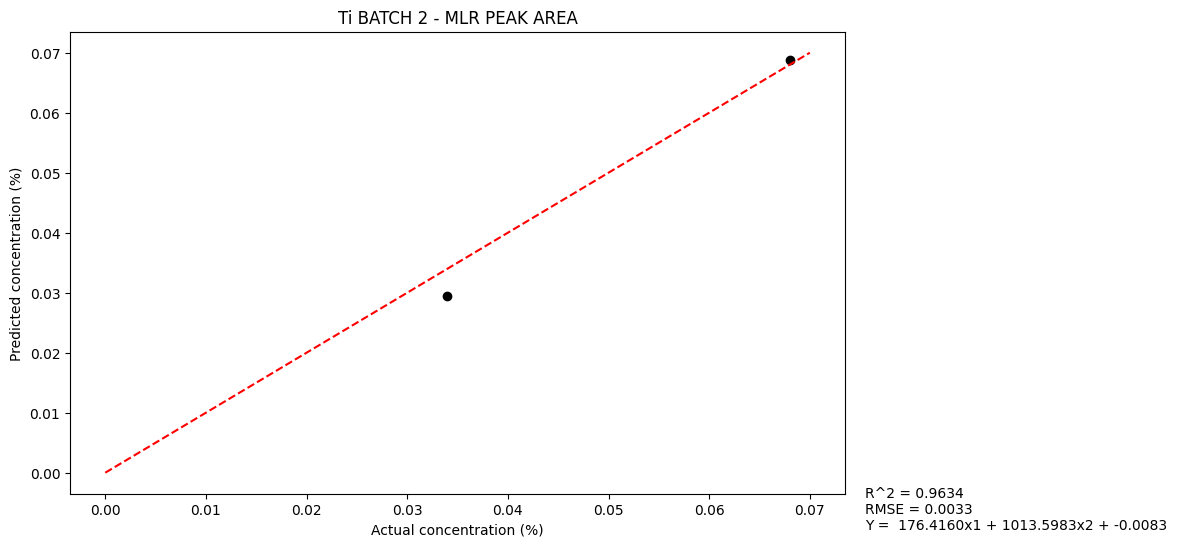

In [42]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)
# model_scor = model.score(X_train,y_train)
# model_rmse = np.sqrt(mean_squared_error(X_train, y_train))
# print('calibration r2: ',model_scor)
# print('calibration rmse: ',model_rmse)

conc_prediction = model.predict(X_test)



r2 = r2_score(y_test , conc_prediction )
rmse = np.sqrt(mean_squared_error(y_test, conc_prediction))

print('validation r2: ',r2)
print('validation rmse: ',rmse)



# Get the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_


# Print the model coefficients and intercept
print("Model Coefficients:", coefficients)
print("Model Intercept:", intercept)

# Create the equation string
coeff_str = ' + '.join([f'{coef:.4f}x{i+1}' for i, coef in enumerate(coefficients)])
equation = f'Y =  {coeff_str} + {intercept:.4f}'


print (equation)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, conc_prediction, color='black', label='Predicted Conc vs Actual Conc')
plt.plot([0,0.07], [0,0.07], color='red', linestyle='--')
title_6 = (Element_name) + ' BATCH 2 - MLR PEAK AREA' +''
plt.title(title_6)
plt.xlabel('Actual concentration (%)')
plt.ylabel('Predicted concentration (%)')
plt.text(0.92,0.05, f'R^2 = {r2:.4f}\nRMSE = {rmse:.4f}\n{equation}', transform=plt.gcf().transFigure, fontsize=10)
# plt.savefig((title_6)+ ".png" ,dpi = 1200 , bbox_inches='tight')
plt.show()


[0.044 0.037 0.034 0.014 0.051 0.068 0.028]
[[0.03832006]
 [0.04994249]
 [0.02725828]
 [0.02128706]
 [0.04757147]
 [0.07402282]
 [0.02877774]]
R-squared (R²): 0.8055
Root Mean Squared Error (RMSE): 0.0070


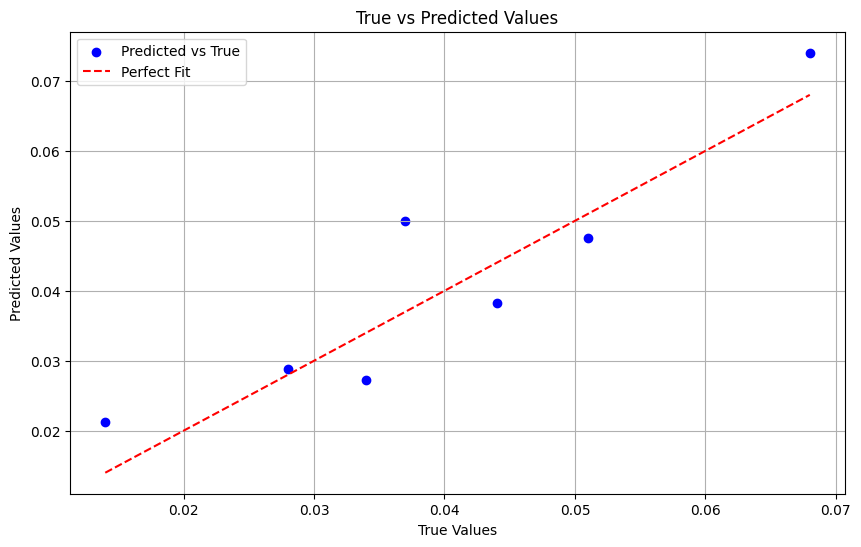

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming df is your DataFrame
# Prepare the feature matrix and target vector
X = (X_locov).to_numpy()
y = (y_locov).to_numpy()



# Initialize lists to store results
predictions = []
true_values = []
# intercepts =[]
# slopes = []

# Perform LOCOV
for i in range(len(X_locov)):
    # Define training and validation sets
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)
    X_val = X[i].reshape(1,-1)
    y_val = y[i]
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val).reshape(1,-1)
    # Store results
    predictions.append(y_pred[0]) #extract the value from the array
    true_values.append(y_val)

    # Extract and store coefficients
    # intercepts.append(model.intercept_[0])
    # slopes.append(model.coef_[0][0])



# Convert lists to numpy arrays for evaluation
predictions = np.array(predictions)
true_values = np.array(true_values)

print (true_values)

print (predictions)

# Calculate metrics
mse = mean_squared_error(true_values, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(true_values, predictions)

# print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Print the average coefficients
# average_intercept = np.mean(intercepts)
# average_slope = np.mean(slopes)
# print(f"Average Intercept: {average_intercept:.4f}")
# print(f"Average Slope: {average_slope:.4f}")


# Plot true vs. predicted values
plt1.figure(figsize=(10, 6))
plt1.scatter(true_values, predictions, color='blue', label='Predicted vs True')
plt1.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--', label='Perfect Fit')
plt1.xlabel('True Values')
plt1.ylabel('Predicted Values')
plt1.title('True vs Predicted Values')
plt1.legend()
plt1.grid(True)
plt1.show()



[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[3, 4]
[3, 5]
[3, 6]
[4, 5]
[4, 6]
[5, 6]
R-squared (R²): 0.6869
Root Mean Squared Error (RMSE): 0.0089


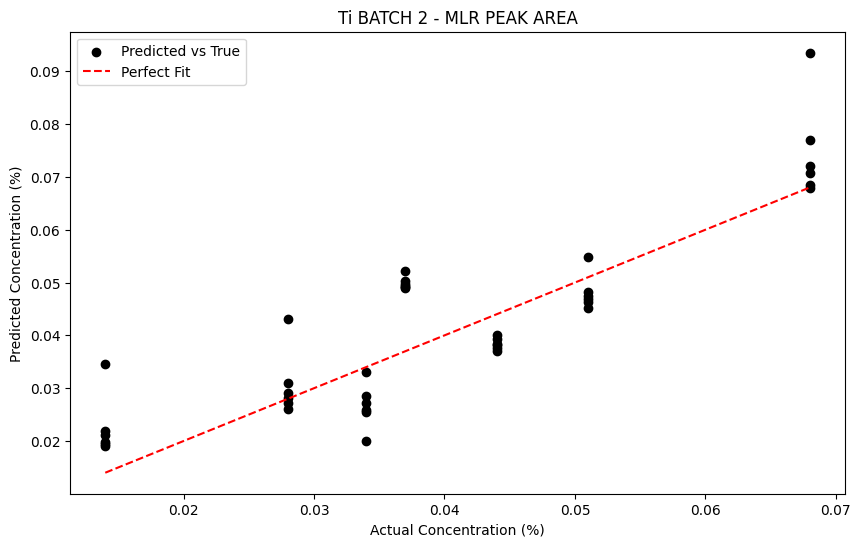

In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Prepare the feature matrix and target vector
X = X_locov.to_numpy()
y = y_locov.to_numpy()


# Parameters
P = 2  # Number of samples to leave out for validation

# Initialize lists to store results
predictions = []
true_values = []
r2_average = []
rmse_average = []

# Generate all possible combinations of indices to leave out
combinations = list(itertools.combinations(range(len(y)), P))


# Perform LPOCV
for comb in combinations:
    # Define training and validation sets
    val_indices = list(comb)
    train_indices = [i for i in range(len(X)) if i not in val_indices]
    print (val_indices)
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_val = X[val_indices]
    y_val = y[val_indices]
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)

    r2_alone = r2_score(y_val ,y_pred)
    rmse_alone = np.sqrt(mean_squared_error(y_val, y_pred))

    r2_average.append(r2_alone)
    rmse_average.append(rmse_alone)
    
    # Store results
    predictions.extend(y_pred.flatten())  # Flatten and append to list
    true_values.extend(y_val.flatten())   # Flatten and append to list

# Convert lists to numpy arrays for evaluation
predictions = np.array(predictions)
true_values = np.array(true_values)

# Calculate metrics
mse = mean_squared_error(true_values, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(true_values, predictions)

# print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


# #r2 and rmse average 

# r2_avg = sum(r2_average) / len(r2_average)
# print(r2_average)

# # rmse_avg = sum(rmse_average) / len(rmse_average)
# print(rmse_average)




# Plot true vs. predicted values

plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, color='black', label='Predicted vs True')
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Concentration (%)')
plt.ylabel('Predicted Concentration (%)')
plt.title(title_6)
plt.legend()
plt.show()
